In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

#### reflect tables into SQLAlchemy ORM

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
#help(Measurement)

#### Data in Measurement
date, id, prcp, station, tobs

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
row_count = session.query(Measurement.date).count()
row_count

19550

#### Get them all

In [11]:
results = session.query(Measurement.date, Measurement.id, Measurement.prcp, Measurement.station, Measurement.tobs).all()
df = pd.DataFrame(results, columns=['date', 'id', 'prcp', 'station', 'tobs'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     19550 non-null  object 
 1   id       19550 non-null  int64  
 2   prcp     18103 non-null  float64
 3   station  19550 non-null  object 
 4   tobs     19550 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 763.8+ KB


In [13]:
df

,date,id,prcp,station,tobs
0,2010-01-01,1,0.08,USC00519397,65.0
1,2010-01-02,2,0.00,USC00519397,63.0
2,2010-01-03,3,0.00,USC00519397,74.0
3,2010-01-04,4,0.00,USC00519397,76.0
4,2010-01-06,5,NaN,USC00519397,73.0
...,...,...,...,...,...
19545,2017-08-19,19546,0.09,USC00516128,71.0
19546,2017-08-20,19547,NaN,USC00516128,78.0
19547,2017-08-21,19548,0.56,USC00516128,76.0
19548,2017-08-22,19549,0.50,USC00516128,76.0


In [14]:
df.count()

date       19550
id         19550
prcp       18103
station    19550
tobs       19550
dtype: int64

In [15]:
df = df.sort_values(by=['date'])
df

,date,id,prcp,station,tobs
0,2010-01-01,1,0.08,USC00519397,65.0
9007,2010-01-01,9008,0.21,USC00518838,72.0
9518,2010-01-01,9519,0.15,USC00519523,75.0
12187,2010-01-01,12188,0.15,USC00519281,70.0
14959,2010-01-01,14960,0.05,USC00511918,66.0
...,...,...,...,...,...
19548,2017-08-22,19549,0.50,USC00516128,76.0
2723,2017-08-23,2724,0.00,USC00519397,81.0
7634,2017-08-23,7635,0.00,USC00514830,82.0
12186,2017-08-23,12187,0.08,USC00519523,82.0


#### All June data

In [16]:
is_jun = [False] * df.shape[0]
for y in range(2010, 2018):
    jun_1 = str(y) + "-06-01"
    jul_1 = str(y) + "-07-01"
    is_jun = is_jun | ((df["date"] >= jun_1) & (df["date"] < jul_1))
jun_df = df.loc[is_jun]
jun_df.shape

(1700, 5)

#### Average June daily precipitation across all stations and Years 

In [17]:
jun_df["prcp"].describe()

count    1574.000000
mean        0.136360
std         0.335731
min         0.000000
25%         0.000000
50%         0.020000
75%         0.120000
max         4.430000
Name: prcp, dtype: float64

#### Average June temperature across all stations and Years 

In [18]:
jun_df["tobs"].describe()

count    1700.000000
mean       74.944118
std         3.257417
min        64.000000
25%        73.000000
50%        75.000000
75%        77.000000
max        85.000000
Name: tobs, dtype: float64

#### All data in December

In [19]:
is_dec = [False] * df.shape[0]
for y in range(2010, 2018):
    dec_1 = str(y) + "-12-01"
    jan_1 = str(y + 1) + "-01-01"
    is_dec = is_dec | ((df["date"] >= dec_1) & (df["date"] < jan_1))
dec_df = df.loc[is_dec]
dec_df.shape

(1517, 5)

#### Average December daily precipitation across all stations and Years 

In [20]:
dec_df["prcp"].describe()

count    1405.000000
mean        0.216819
std         0.541399
min         0.000000
25%         0.000000
50%         0.030000
75%         0.150000
max         6.420000
Name: prcp, dtype: float64

#### Average December temperature across all stations and Years 

In [21]:
dec_df["tobs"].describe()

count    1517.000000
mean       71.041529
std         3.745920
min        56.000000
25%        69.000000
50%        71.000000
75%        74.000000
max        83.000000
Name: tobs, dtype: float64

### box-and-whisker plots

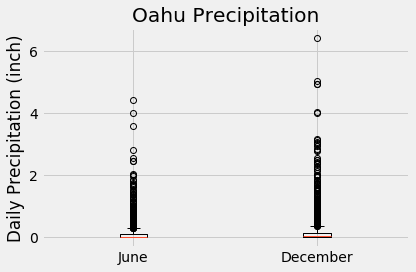

In [22]:
fig, ax = plt.subplots()

x_labels = ["June", "December"]
ax.boxplot([jun_df["prcp"].dropna(), dec_df["prcp"].dropna()], labels=x_labels)

ax.set_ylabel("Daily Precipitation (inch)")
ax.set_title("Oahu Precipitation")
plt.tight_layout()
plt.savefig("Fig_1")
plt.show()

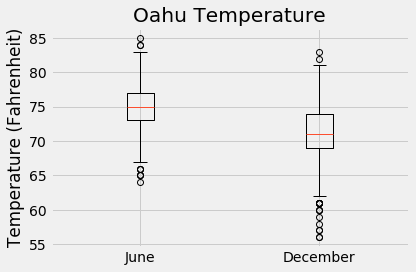

In [23]:
fig, ax = plt.subplots()

x_labels = ["June", "December"]
ax.boxplot([jun_df["tobs"].dropna(), dec_df["tobs"].dropna()], labels=x_labels)

ax.set_ylabel("Temperature (Fahrenheit)")
ax.set_title("Oahu Temperature")
plt.tight_layout()
plt.savefig("Fig_2")
plt.show()